apm 95.239.21.134_gk_model5 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            3
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:           4485
 Number of total equations: -         4186
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            299
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

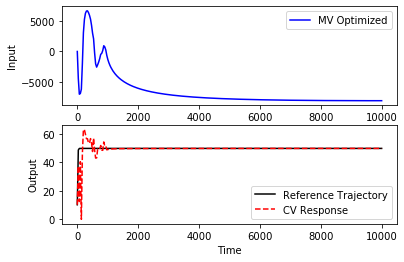

In [6]:
import json
from gekko import GEKKO
import numpy as np
import math
import matplotlib.pyplot as plt

m = GEKKO()
m.time = np.linspace(0,10000,300)

# Parameters
mass = 230  # 230 kg
j = 2100  # 2100 kg*m^2
g = 9.81  # 9.8 m/s^2
l = 1  # 1 m

# Manipulated variable
u = m.MV(value=0)
u.STATUS = 1  # allow optimizer to change

# Controlled Variable
x1 = m.CV(value=10, ub=90)
x1.STATUS = 1  # add the SP to the objective
m.options.CV_TYPE = 2  # squared error
x1.SP = 50    # set point
x1.TR_INIT = 1  # set point trajectory
x1.TAU = 1     # time constant of trajectory

# Controlled Variable
x2 = m.CV(value=10)

# Process model
m.Equations([x1.dt() == x2, 
             x2.dt() == -(mass*g*l*m.cos(x1))/(mass*l**2+j-mass*(l**2)*(m.sin(x1))**2) 
             +((l*m.sin(x1))/(mass*l**2+j-mass*l**2*(m.sin(x1))**2))*(u)])

m.options.IMODE = 6  # control
m.solve(disp=True)

# get additional solution information
with open(m.path+'//results.json') as f:
    results = json.load(f)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(m.time, u.value, 'b-', label='MV Optimized')
plt.legend()
plt.ylabel('Input')
plt.subplot(2, 1, 2)
plt.plot(m.time, results['v1.tr'], 'k-', label='Reference Trajectory')
plt.plot(m.time, x1.value, 'r--', label='CV Response')
plt.ylabel('Output')
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()
